In [1]:
%matplotlib inline

In [2]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [3]:
# path to clean data

clean_data_path = "/Users/dallingleed/Downloads/Capstone Project/cleaned_autos_2.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

df.tail()

,Date Crawled,Name,Seller,Offer Type,Price,AB Test,Vehicle Type,Year of Registration,Gearbox,Power,...,Kilometers,Month of Registration,Fuel Type,Brand,Not Repaired,Date Created,Postal Code,Last Seen,Years Old,Months Old
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,Manual,0,...,150000,Jul,Gasoline,mitsubishi,Yes,2016-03-21 00:00:00,2694,2016-03-21 10:42:49,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,20000,Jan,Other,sonstige_autos,Other,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,Convertible,2000,Automatic,101,...,125000,Mar,Gasoline,smart,No,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,Bus,1996,Manual,102,...,150000,Mar,Diesel,volkswagen,No,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,20,9
313686,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Offer,3400,test,Van,2002,Manual,100,...,150000,Jun,Diesel,volkswagen,Other,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,14,6


In [4]:
trial = pd.DataFrame()
for b in list(df["Brand"].unique()):
    for v in list(df["Vehicle Type"].unique()):
        z = df[(df["Brand"] == b) & (df["Vehicle Type"] == v)]["Price"].mean()
        trial = trial.append(pd.DataFrame({'Brand':b , 'Vehicle Type':v , 'Average Price':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["Average Price"].fillna(0,inplace=True)
trial["Average Price"].isnull().value_counts()
trial["Average Price"] = trial["Average Price"].astype(int)
trial.head(5)

,Brand,Vehicle Type,Average Price
0,volkswagen,Other,1106
1,volkswagen,Coupe,8014
2,volkswagen,SUV,13946
3,volkswagen,Supermini,1626
4,volkswagen,Limo,3743


## Average price of a vehicle by brand as well as vehicle type 

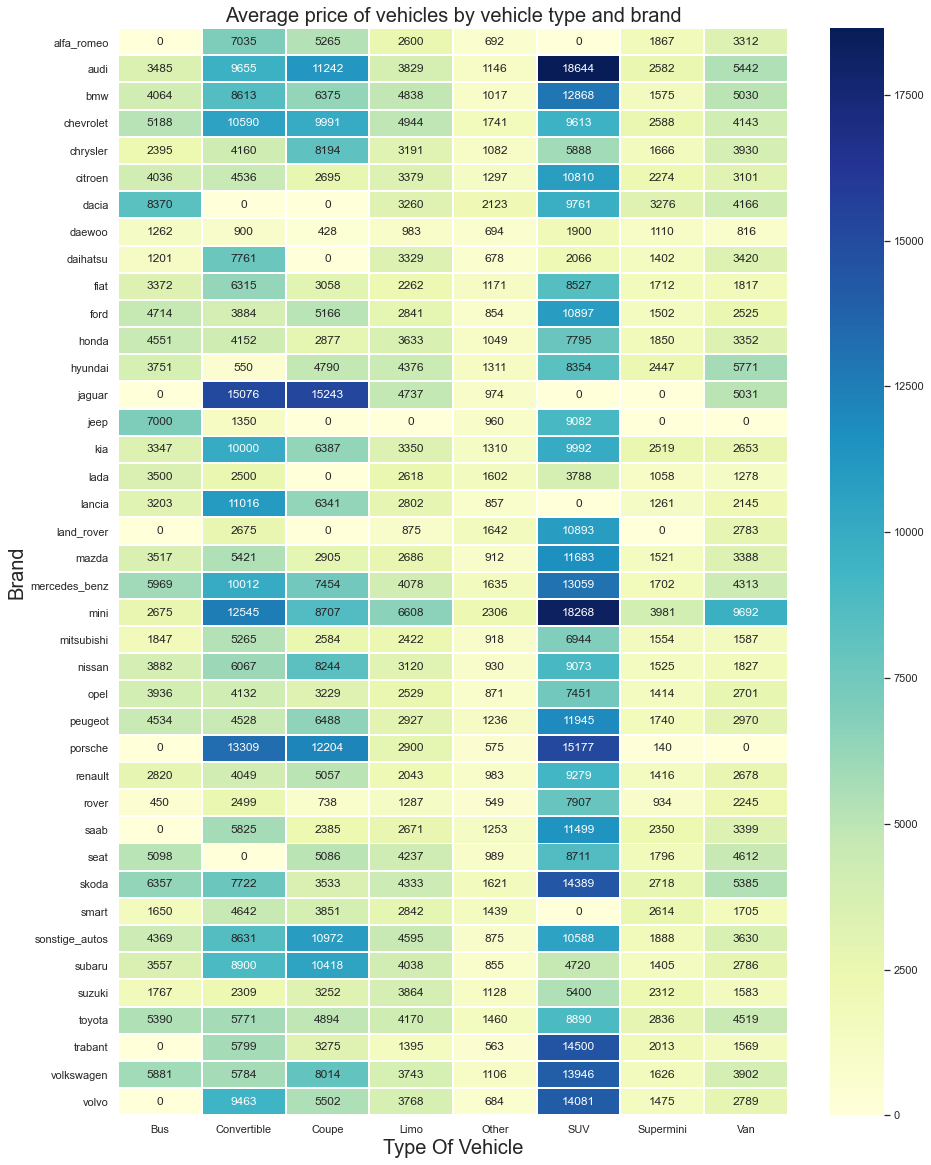

In [5]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("Brand","Vehicle Type", "Average Price")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [6]:
fig.savefig(("/Users/dallingleed/Downloads/Capstone Project/Analysis4Plots/heatmap-price-brand-vehicleType.png"))